In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00


In [ ]:
import argparse
import os.path as osp
import os
import numpy as np
from torch_geometric.datasets import UPFD
from torch_geometric.loader import DataLoader
from torch_geometric.transforms import ToUndirected
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from torch_geometric.transforms import ToUndirected

## Get the UPFD dataset

In [ ]:
dataset_type = ['politifact', 'gossipcop']
feature_type = ['profile', 'spacy', 'bert', 'content']

In [ ]:
def get_data(dataset, feature) :

  dataset = dataset  # Choose from ['politifact', 'gossipcop']
  feature = feature  # Choose from ['profile', 'spacy', 'bert', 'content']

  path = os.path.join(os.getcwd(), 'data', 'UPFD')

  train_dataset = UPFD(path, dataset, feature, 'train', ToUndirected())
  val_dataset = UPFD(path, dataset, feature, 'val', ToUndirected())
  test_dataset = UPFD(path, dataset, feature, 'test', ToUndirected())

  return train_dataset, val_dataset, test_dataset

## Analyze the data

In [ ]:
def analyze_data(dataset, feature) :
  print(f" ----------------------{dataset}-{feature}---------------------- ")
  train_dataset, val_dataset, test_dataset = get_data(dataset, feature)

  data = train_dataset[0]

  print(f"Number of graphs in the training dataset : {len(train_dataset)}\n")
  print(f"Node feature matrix of the first graph in the training dataset : \n{data.x}\n")
  print(f"Label of the graph : {data.y}\n")

In [ ]:
analyze_data('politifact', 'bert')
analyze_data('politifact', 'content')
analyze_data('politifact', 'spacy')
analyze_data('politifact', 'profile')

 ----------------------politifact-bert---------------------- 


Extracting /content/data/UPFD/politifact/raw/data.zip
Processing...
Done!


Number of graphs in the training dataset : 62

Node feature matrix of the first graph in the training dataset : 
tensor([[ 0.4983,  0.1415,  0.3561,  ..., -0.4199,  0.2446,  1.0323],
        [-0.0111, -0.0716, -0.1016,  ...,  0.4221, -0.1941,  0.2685],
        [ 0.0332,  0.1159,  0.0657,  ...,  0.3730, -0.0025,  0.5887],
        ...,
        [ 0.0062,  0.0708,  0.0217,  ...,  0.3643, -0.0376,  0.5008],
        [ 0.0360,  0.0502,  0.0446,  ...,  0.4044, -0.0616,  0.4972],
        [ 0.0360,  0.0502,  0.0446,  ...,  0.4044, -0.0616,  0.4972]])

Label of the graph : tensor([0])

 ----------------------politifact-content---------------------- 


Processing...
Done!
Processing...


Number of graphs in the training dataset : 62

Node feature matrix of the first graph in the training dataset : 
tensor([[0.5976, 0.6060, 0.4387,  ..., 0.2977, 0.1671, 0.3661],
        [0.6427, 0.4752, 0.4824,  ..., 0.1014, 0.0769, 0.3514],
        [0.6165, 0.5997, 0.4099,  ..., 0.1959, 0.0769, 0.0811],
        ...,
        [0.7044, 0.5582, 0.4540,  ..., 0.2973, 0.1538, 0.2703],
        [0.5976, 0.6060, 0.4387,  ..., 0.2977, 0.1671, 0.3661],
        [0.5976, 0.6060, 0.4387,  ..., 0.2977, 0.1671, 0.3661]])

Label of the graph : tensor([0])

 ----------------------politifact-spacy---------------------- 


Done!
Processing...


Number of graphs in the training dataset : 62

Node feature matrix of the first graph in the training dataset : 
tensor([[ 0.0703,  0.1616, -0.2424,  ..., -0.1118,  0.0284,  0.1674],
        [-0.0278,  0.1071, -0.0021,  ..., -0.0519, -0.0128,  0.0484],
        [-0.0100,  0.1131, -0.0534,  ..., -0.0250, -0.0203,  0.0657],
        ...,
        [-0.0481,  0.0933, -0.0669,  ..., -0.0382,  0.0010,  0.0444],
        [-0.0364,  0.1136, -0.0556,  ..., -0.0433, -0.0068,  0.0577],
        [-0.0364,  0.1136, -0.0556,  ..., -0.0433, -0.0068,  0.0577]])

Label of the graph : tensor([0])

 ----------------------politifact-profile---------------------- 
Number of graphs in the training dataset : 62

Node feature matrix of the first graph in the training dataset : 
tensor([[0.0000e+00, 0.0000e+00, 2.9157e-03, 8.0265e-03, 8.9000e-03, 1.2105e-02,
         8.9918e-03, 2.9033e-01, 1.6587e-01, 3.7120e-01],
        [1.0000e+00, 1.0000e+00, 9.4289e-02, 2.9791e-03, 4.4348e-02, 6.2028e-05,
         3.0133e-01,

Done!


In [ ]:
analyze_data('gossipcop', 'bert')
analyze_data('gossipcop', 'content')
analyze_data('gossipcop', 'spacy')
analyze_data('gossipcop', 'profile')

 ----------------------gossipcop-bert---------------------- 


Extracting /content/data/UPFD/gossipcop/raw/data.zip
Processing...
Done!


Number of graphs in the training dataset : 1092

Node feature matrix of the first graph in the training dataset : 
tensor([[-0.0848, -0.2643, -0.2449,  ..., -0.1209,  0.1636,  0.4188],
        [ 0.1415, -0.0493, -0.1443,  ...,  0.4186, -0.0096,  0.2688],
        [-0.0319,  0.0562,  0.4386,  ...,  0.2217,  0.0694,  0.6907],
        ...,
        [ 0.0231,  0.1641,  0.0682,  ...,  0.4842,  0.0395,  0.8409],
        [-0.0714,  0.1860,  0.1526,  ...,  0.4669, -0.1010,  0.5712],
        [ 0.0569,  0.1775,  0.1596,  ...,  0.5712,  0.0127,  0.5610]])

Label of the graph : tensor([0])

 ----------------------gossipcop-content---------------------- 


Processing...
Done!


Number of graphs in the training dataset : 1092

Node feature matrix of the first graph in the training dataset : 
tensor([[0.5100, 0.5259, 0.5432,  ..., 0.6794, 0.1175, 0.1534],
        [0.4455, 0.5350, 0.5522,  ..., 0.0890, 0.1111, 0.1324],
        [0.4417, 0.5409, 0.5583,  ..., 0.4658, 0.1667, 0.1765],
        ...,
        [0.5250, 0.5461, 0.5496,  ..., 0.8904, 0.1111, 0.0588],
        [0.4677, 0.5249, 0.5637,  ..., 0.6233, 0.2222, 0.3529],
        [0.5428, 0.5370, 0.5246,  ..., 0.7740, 0.1111, 0.2500]])

Label of the graph : tensor([0])

 ----------------------gossipcop-spacy---------------------- 


Processing...
Done!


Number of graphs in the training dataset : 1092

Node feature matrix of the first graph in the training dataset : 
tensor([[-0.0026,  0.1567, -0.0854,  ..., -0.0624,  0.0178,  0.0736],
        [-0.0388,  0.1407,  0.0026,  ..., -0.0533, -0.0104,  0.0431],
        [ 0.0381,  0.1784,  0.0120,  ..., -0.0069, -0.0540,  0.0620],
        ...,
        [ 0.0127,  0.1149, -0.0242,  ..., -0.0418, -0.0145,  0.0705],
        [ 0.0105,  0.0815, -0.0476,  ..., -0.0289, -0.0128,  0.0473],
        [-0.0224,  0.1217, -0.1517,  ..., -0.0256,  0.0195,  0.0659]])

Label of the graph : tensor([0])

 ----------------------gossipcop-profile---------------------- 


Processing...


Number of graphs in the training dataset : 1092

Node feature matrix of the first graph in the training dataset : 
tensor([[0.0000e+00, 0.0000e+00, 5.9720e-03, 3.8840e-03, 2.8949e-02, 1.9993e-03,
         4.3260e-03, 6.7935e-01, 1.1746e-01, 1.5336e-01],
        [0.0000e+00, 1.0000e+00, 6.4204e-05, 2.6910e-03, 1.7100e-01, 1.3397e-05,
         4.8150e-04, 8.9041e-02, 1.1111e-01, 1.3235e-01],
        [0.0000e+00, 1.0000e+00, 1.6861e-05, 1.2614e-03, 3.2820e-02, 8.7871e-05,
         1.6603e-04, 4.6575e-01, 1.6667e-01, 1.7647e-01],
        [0.0000e+00, 0.0000e+00, 3.4837e-08, 1.0476e-04, 8.5278e-04, 7.2503e-05,
         0.0000e+00, 8.4247e-01, 1.1111e-01, 1.3235e-01],
        [0.0000e+00, 0.0000e+00, 3.9832e-04, 4.6899e-03, 1.6929e-02, 1.3397e-05,
         3.7358e-04, 4.4521e-01, 2.7778e-01, 3.9706e-01],
        [0.0000e+00, 1.0000e+00, 1.9822e-05, 1.0794e-03, 4.6407e-02, 3.9404e-06,
         1.9924e-04, 6.1644e-01, 5.5556e-02, 5.8824e-02],
        [0.0000e+00, 1.0000e+00, 2.6026e-04, 2.2391

Done!


* Each graph has feature vectors (here, BERT-encoded with a dimension of 768) which represent the root node (the source news) and the Twitter user's historical tweets.

* A single binary label, indicating whether the source news is fake or real.

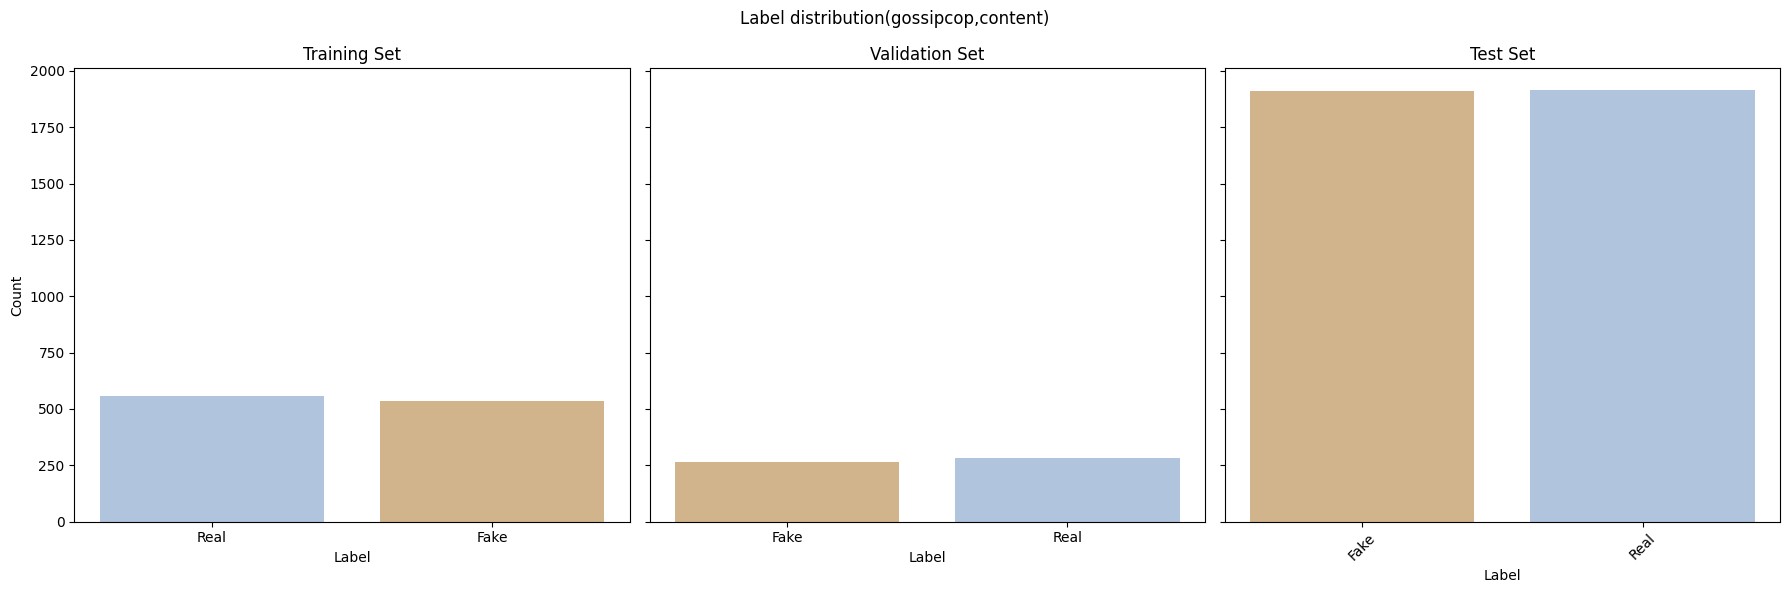

In [ ]:
from collections import Counter

def plot_label_distribution_horizontal(datasets, titles):
    fig, axes = plt.subplots(1, len(datasets), figsize=(18, 6), sharey=True)

    for i, dataset in enumerate(datasets):
        ax = axes[i]
        label_counts = Counter([data.y.item() for data in dataset])
        labels, counts = zip(*label_counts.items())

        ax.bar(labels, counts, tick_label=['Real', 'Fake'], color=['lightsteelblue', 'tan'])
        ax.set_xlabel('Label')
        ax.set_title(titles[i])

    axes[0].set_ylabel('Count')
    plt.suptitle('Label distribution(gossipcop,content)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

train_dataset, val_dataset, test_dataset = get_data('gossipcop', 'content')
plot_label_distribution_horizontal(
    [train_dataset, val_dataset, test_dataset],
    ['Training Set', 'Validation Set', 'Test Set']
)

We can remark that the training and validation datasets are little bit unbalanced, especially when the datasets are this small.

## Data Aggregation

Traditional machine learning models expect tabular data as input, where each sample is a single feature vector. That is why we should aggregate the node features into a single feature vector.

Here we are using the global mean pooling technique which compute the mean of all node features in the graph.

In [ ]:
def aggregate_features(dataset, feature):

  def get_aggregate_features(data) :
    graph_features = []
    graph_labels = []
    for d in data:
      # mean of all node features
      aggregated_features = d.x.mean(dim=0).numpy()
      graph_features.append(aggregated_features)
      # extract the graph label
      graph_labels.append(d.y.item())
    return np.array(graph_features), np.array(graph_labels)

  train_dataset, val_dataset, test_dataset = get_data(dataset, feature)

  train = get_aggregate_features(train_dataset)
  valid = get_aggregate_features(val_dataset)
  test = get_aggregate_features(test_dataset)
  return train[0], train[1], valid[0], valid[1], test[0], test[1]

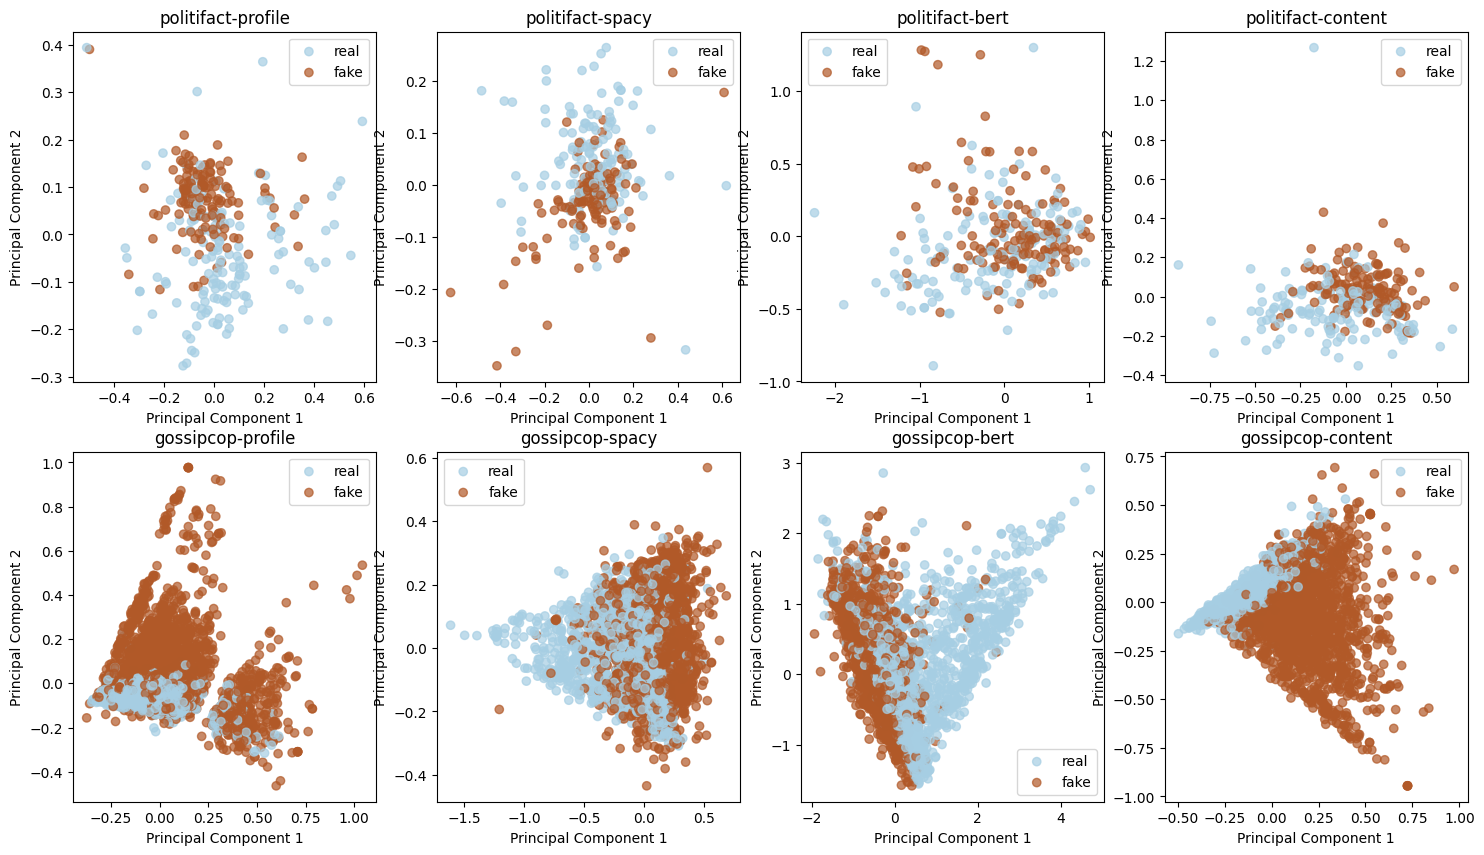

In [ ]:
from sklearn.decomposition import PCA
from itertools import product

def print_pca() :

  fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
  for ni,i in enumerate(dataset_type) :
      for nj, j in enumerate(feature_type) :

        # aggregate features for training, validation, and test datasets
        X_train, y_train, X_val, y_val, X_test, y_test = aggregate_features(i, j)

        # reduce dimensions to 2 for visualization
        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # plot PCA

        ax[ni, nj].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Paired', alpha=0.7)
        ax[ni, nj].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='Paired', alpha=0.7)

        ax[ni, nj].set_title(f"{i}-{j}")
        ax[ni, nj].set_xlabel("Principal Component 1")
        ax[ni, nj].set_ylabel("Principal Component 2")
        ax[ni, nj].legend(['real', 'fake'])


  plt.show()

print_pca()


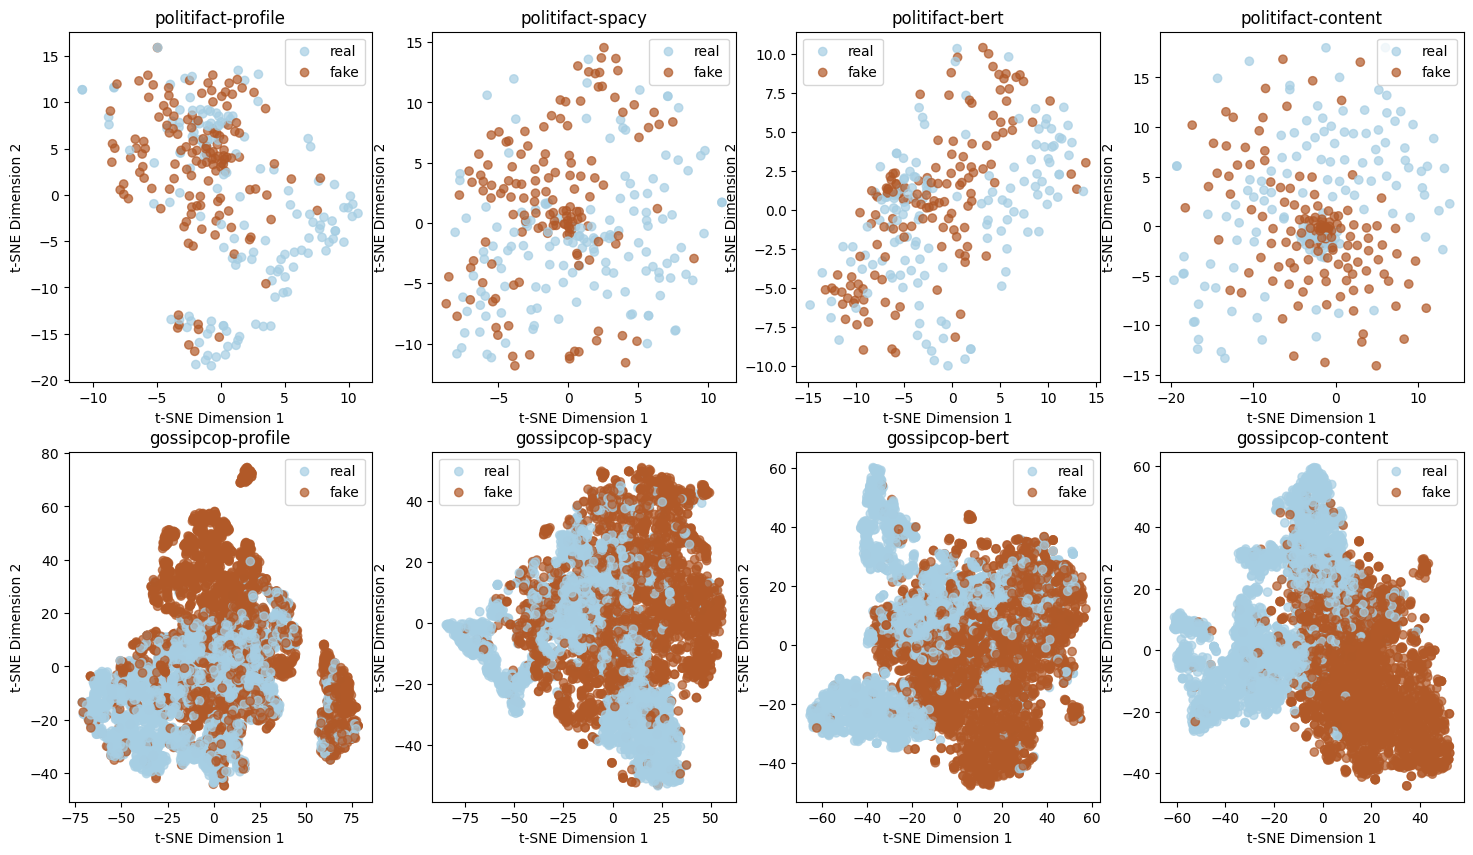

In [ ]:
from sklearn.manifold import TSNE

def make_tsne() :
  fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
  for ni,i in enumerate(dataset_type) :
    for nj, j in enumerate(feature_type) :
      # aggregate features for training, validation, and test datasets
      X_train, y_train, X_val, y_val, X_test, y_test = aggregate_features(i, j)

      # use t-SNE
      tsne = TSNE(n_components=2, random_state=42)
      X_train_tsne = tsne.fit_transform(X_train)
      X_test_tsne = tsne.fit_transform(X_test)

      ax[ni, nj].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='Paired', alpha=0.7)
      ax[ni, nj].scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='Paired', alpha=0.7)
      ax[ni, nj].set_title(f"{i}-{j}")
      ax[ni, nj].set_xlabel("t-SNE Dimension 1")
      ax[ni, nj].set_ylabel("t-SNE Dimension 2")
      ax[ni, nj].legend(['real', 'fake'])
  plt.show()

make_tsne()

Normalize the features to ensure they are scaled appropriately.

In [ ]:
def normalize(X_train, X_val, X_test) :
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)
  X_test = scaler.transform(X_test)
  return X_train, X_val, X_test

# Traditional machine learning model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

def train(model_name) :

  print(f" ------------------{model_name}------------------ \n")

  def get_model(model_name) :
    if model_name == "logistic_regression" :
      return LogisticRegression(random_state=42, max_iter=1000)
    elif model_name == "random_forest" :
      return RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_name == "naive_bayes" :
      return GaussianNB()
    elif model_name == "linear_svm" :
      return SVC(kernel='linear', random_state=42)


  def get_result(y_val_pred, y_test_pred, y_val, y_test) :
    print("Validation accuracy:", accuracy_score(y_val, y_val_pred))
    print("Test accuracy:", accuracy_score(y_test, y_test_pred))
    print("--------------------------------\n")

    return accuracy_score(y_test, y_test_pred)

  def print_results(test_acc_list) :                       #0,1,2,3,4
    politifact_test_acc = test_acc_list[:int(len(test_acc_list)/2)]
    gossipcop_test_acc = test_acc_list[int(len(test_acc_list)/2):]

    print("Politifact dataset accuracy mean:", sum(politifact_test_acc)/len(politifact_test_acc))
    print("Gossipcop dataset accuracy mean:", sum(gossipcop_test_acc)/len(gossipcop_test_acc))
    print("Dataset accuracy mean:", sum(gossipcop_test_acc)+sum(politifact_test_acc)/len(gossipcop_test_acc)+len(politifact_test_acc),"\n")


    best_acc_poli = max(politifact_test_acc)
    best_acc_goss = max(gossipcop_test_acc)

    if best_acc_poli > best_acc_goss :
      best_index = politifact_test_acc.index(best_acc_poli)
      best_dataset = 'politifact'
      best_acc = best_acc_poli
    else :
      best_index = gossipcop_test_acc.index(best_acc_goss)
      best_dataset = 'gossipcop'
      best_acc = best_acc_goss
    best_feature = feature_type[best_index]


    worst_acc_poli = min(politifact_test_acc)
    worst_acc_goss = min(gossipcop_test_acc)

    if worst_acc_poli < worst_acc_goss :
      worst_index = politifact_test_acc.index(worst_acc_poli)
      worst_dataset = 'politifact'
      worst_acc = worst_acc_poli
    else :
      worst_index = gossipcop_test_acc.index(worst_acc_goss)
      worst_dataset = 'gossipcop'
      worst_acc = worst_acc_goss
    worst_feature = feature_type[worst_index]

    print("Best test accuracy:",best_acc)
    print("Best dataset:", best_dataset)
    print("Best feature:", best_feature,"\n")

    print("Worst test accuracy:",worst_acc)
    print("Worst dataset:", worst_dataset)
    print("Worst feature:", worst_feature,"\n")

    return best_dataset, best_feature


  def get_prediction(i,j) :
    # aggregate features for training, validation, and test datasets
    X_train, y_train, X_val, y_val, X_test, y_test = aggregate_features(i, j)
    X_train, X_val, X_test = normalize(X_train, X_val, X_test)

    model = get_model(model_name)
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    test_acc = get_result(y_val_pred, y_test_pred, y_val, y_test)

    return model, y_test, y_test_pred, test_acc

  test_acc_list = []

  for ni,i in enumerate(dataset_type) :
    for nj, j in enumerate(feature_type) :

      print(f"{i}-{j}\n")

      model, y_test, y_test_pred, test_acc = get_prediction(i,j)
      test_acc_list.append(test_acc)

  best_dataset, best_feature = print_results(test_acc_list)

  return get_prediction(best_dataset, best_feature)



In [ ]:
def print_confMa(y_test, y_test_pred) :
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Blues', normalize='true')
    plt.title("Confusion Matrix")
    plt.show()

## Logistic Regression

In [ ]:
logistic_model, logistic_y_test, logistic_y_test_pred, _ = train("logistic_regression")

 ------------------logistic_regression------------------ 

politifact-profile

Validation accuracy: 0.8064516129032258
Test accuracy: 0.7601809954751131
--------------------------------

politifact-spacy

Validation accuracy: 0.6774193548387096
Test accuracy: 0.8371040723981901
--------------------------------

politifact-bert

Validation accuracy: 0.8064516129032258
Test accuracy: 0.8371040723981901
--------------------------------

politifact-content

Validation accuracy: 0.8064516129032258
Test accuracy: 0.8868778280542986
--------------------------------

gossipcop-profile

Validation accuracy: 0.8956043956043956
Test accuracy: 0.8703606900156822
--------------------------------

gossipcop-spacy

Validation accuracy: 0.9523809523809523
Test accuracy: 0.9524307370622059
--------------------------------

gossipcop-bert

Validation accuracy: 0.9358974358974359
Test accuracy: 0.9526921066387872
--------------------------------

gossipcop-content

Validation accuracy: 0.9468864468864469

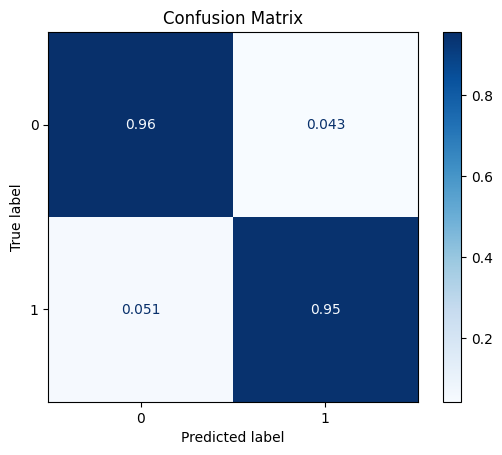

In [ ]:
print_confMa(logistic_y_test, logistic_y_test_pred)

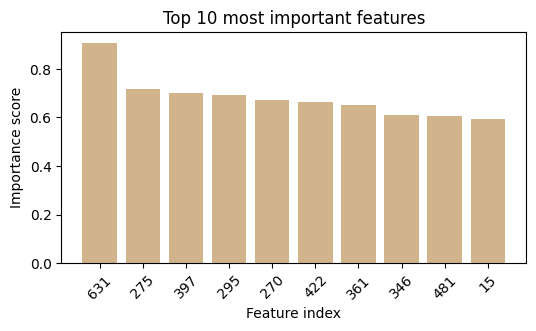

In [ ]:
# feature importance from logistic regression coefficients
importance = np.abs(logistic_model.coef_[0])

# sort by importance
feature_indices = np.argsort(importance)[::-1]

# visualize top 10 features
top_n = 10
plt.figure(figsize=(6, 3))
plt.bar(range(top_n), importance[feature_indices[:top_n]], color="tan")
plt.xticks(range(top_n), feature_indices[:top_n], rotation=45)
plt.title("Top 10 most important features")
plt.xlabel("Feature index")
plt.ylabel("Importance score")
plt.show()

## Random Forest

In [ ]:
rd_model, rd_y_test, rd_y_test_pred,_ = train('random_forest')

 ------------------random_forest------------------ 

politifact-profile

Validation accuracy: 0.8064516129032258
Test accuracy: 0.7647058823529411
--------------------------------

politifact-spacy

Validation accuracy: 0.6774193548387096
Test accuracy: 0.7737556561085973
--------------------------------

politifact-bert

Validation accuracy: 0.7096774193548387
Test accuracy: 0.7737556561085973
--------------------------------

politifact-content

Validation accuracy: 0.8064516129032258
Test accuracy: 0.8868778280542986
--------------------------------

gossipcop-profile

Validation accuracy: 0.9084249084249084
Test accuracy: 0.8930998431782541
--------------------------------

gossipcop-spacy

Validation accuracy: 0.9304029304029304
Test accuracy: 0.9330893883951908
--------------------------------

gossipcop-bert

Validation accuracy: 0.9413919413919414
Test accuracy: 0.9414532148457919
--------------------------------

gossipcop-content

Validation accuracy: 0.9523809523809523
Test 

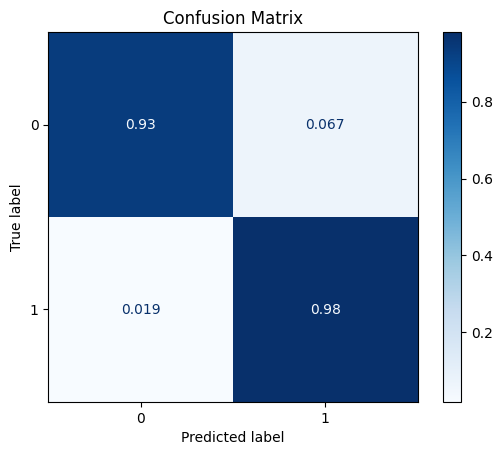

In [ ]:
print_confMa(rd_y_test, rd_y_test_pred)

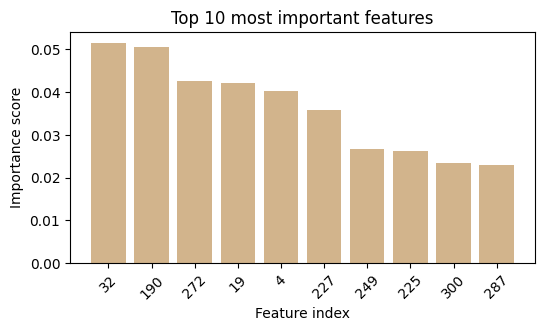

In [ ]:
importance = rd_model.feature_importances_
feature_indices = np.argsort(importance)[::-1]  # Sort by importance

top_n = 10
plt.figure(figsize=(6, 3))
plt.bar(range(top_n), importance[feature_indices[:top_n]], color="tan")
plt.xticks(range(top_n), feature_indices[:top_n], rotation=45)
plt.title("Top 10 most important features")
plt.xlabel("Feature index")
plt.ylabel("Importance score")
plt.show()

## Naive-bayes

In [ ]:
nb_model, nb_y_test, nb_y_test_pred,_ = train("naive_bayes")

 ------------------naive_bayes------------------ 

politifact-profile

Validation accuracy: 0.7741935483870968
Test accuracy: 0.7918552036199095
--------------------------------

politifact-spacy

Validation accuracy: 0.8387096774193549
Test accuracy: 0.7375565610859729
--------------------------------

politifact-bert

Validation accuracy: 0.8064516129032258
Test accuracy: 0.7330316742081447
--------------------------------

politifact-content

Validation accuracy: 0.8064516129032258
Test accuracy: 0.8054298642533937
--------------------------------

gossipcop-profile

Validation accuracy: 0.8571428571428571
Test accuracy: 0.8204391008886566
--------------------------------

gossipcop-spacy

Validation accuracy: 0.8901098901098901
Test accuracy: 0.8808154730789336
--------------------------------

gossipcop-bert

Validation accuracy: 0.8644688644688645
Test accuracy: 0.861996863565081
--------------------------------

gossipcop-content

Validation accuracy: 0.9468864468864469
Test acc

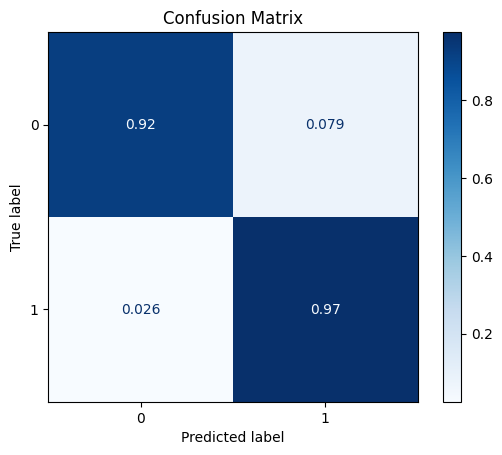

In [ ]:
print_confMa(nb_y_test, nb_y_test_pred)

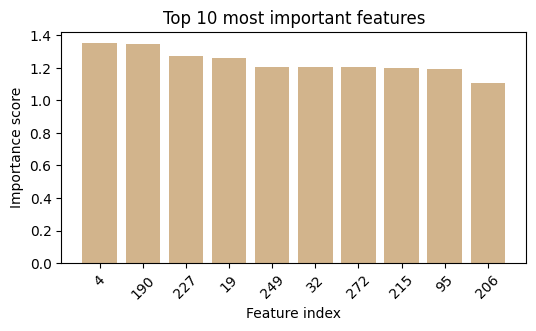

In [ ]:
means = nb_model.theta_
variances = nb_model.var_

# because larger differences = better separability
# then we normalize by the variance because we also should take into account how sprad the values are whithin the class.
importance = np.abs(means[0] - means[1]) / np.sqrt(variances[0] + variances[1])


feature_indices = np.argsort(importance)[::-1]


top_n = 10
plt.figure(figsize=(6, 3))
plt.bar(range(top_n), importance[feature_indices[:top_n]],color='tan')
plt.xticks(range(top_n), feature_indices[:top_n], rotation=45)
plt.title("Top 10 most important features")
plt.xlabel("Feature index")
plt.ylabel("Importance score")
plt.show()

## Linear SVM

In [ ]:
# initialize Linear SVM
svm_model, svm_y_test, svm_y_test_pred,_ = train("linear_svm")

 ------------------linear_svm------------------ 

politifact-profile

Validation accuracy: 0.7741935483870968
Test accuracy: 0.7420814479638009
--------------------------------

politifact-spacy

Validation accuracy: 0.6451612903225806
Test accuracy: 0.832579185520362
--------------------------------

politifact-bert

Validation accuracy: 0.8709677419354839
Test accuracy: 0.8235294117647058
--------------------------------

politifact-content

Validation accuracy: 0.7741935483870968
Test accuracy: 0.8642533936651584
--------------------------------

gossipcop-profile

Validation accuracy: 0.8956043956043956
Test accuracy: 0.872974385781495
--------------------------------

gossipcop-spacy

Validation accuracy: 0.9358974358974359
Test accuracy: 0.9372713016204913
--------------------------------

gossipcop-bert

Validation accuracy: 0.924908424908425
Test accuracy: 0.9307370622059592
--------------------------------

gossipcop-content

Validation accuracy: 0.9194139194139194
Test accura

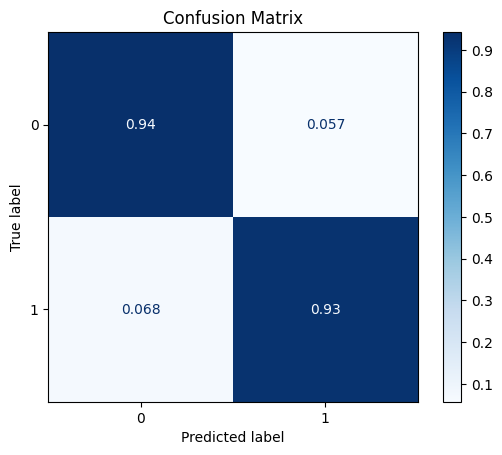

In [ ]:
print_confMa(svm_y_test, svm_y_test_pred)

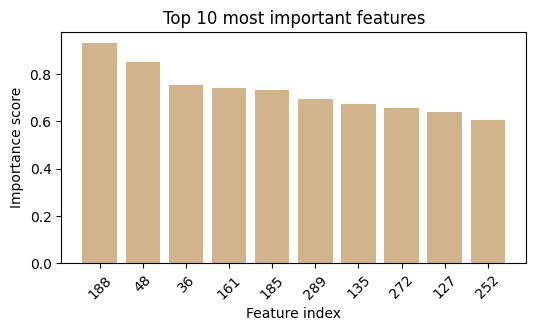

In [ ]:
# extract feature importance from SVM coefficients
importance = np.abs(svm_model.coef_[0])

feature_indices = np.argsort(importance)[::-1]

top_n = 10
plt.figure(figsize=(6, 3))
plt.bar(range(top_n), importance[feature_indices[:top_n]], color='tan')
plt.xticks(range(top_n), feature_indices[:top_n], rotation=45)
plt.title("Top 10 most important features")
plt.xlabel("Feature index")
plt.ylabel("Importance score")
plt.show()
